In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import emd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from esn_lib.mtesn import *
from esn_lib.mthubesn import *
from esn_tasks.mackey_glass.mackey import *

In [13]:
n_train = 500
n_test = 2000
task_pm = {
    'n_train': n_train,
    'n_test': n_test,
    'tau': 17,
}
task = MackeyGlass(**task_pm)
X_train, y_train, X_test, y_test = task.get_data()

max_imfs = 4
X_train = emd.sift.sift(X_train, max_imfs=max_imfs)
X_test = emd.sift.sift(X_test, max_imfs=max_imfs)

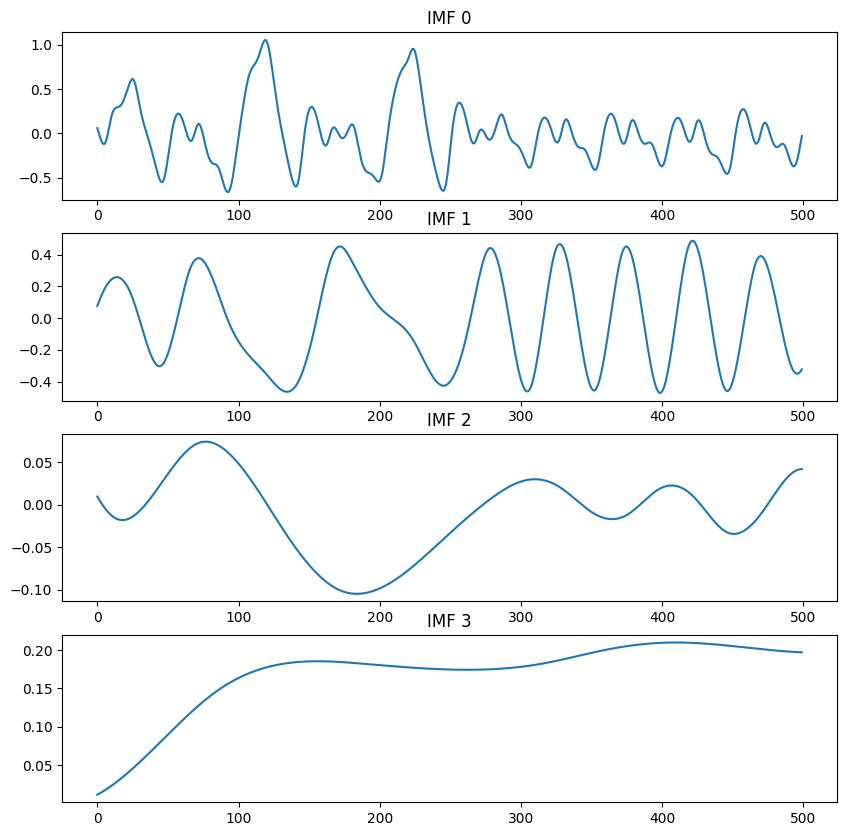

In [14]:
fig, ax = plt.subplots(max_imfs, 1, figsize=(10, 10))
for i in range(max_imfs):
    ax[i].plot(X_train[:, i])
    ax[i].set_title(f'IMF {i}')
plt.show()

In [19]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.9,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': max_imfs,
    'n_task': max_imfs,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'peri',
    'output_neurons': 'out',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'exp_coef': 2,
}

repeat = 50
rmse = []
for i in range(repeat):
    esn = MTESN(**params)
    esn.fit(X_train, y_train)
    y_pred, _ = esn.predict(X_test)
    rmse.append(np.sqrt(np.mean((y_pred - y_test)**2)))
print(f'{np.mean(rmse):.4f} +- {np.std(rmse):.4f}')

0.1791 +- 0.0349


## MT Out only
EMD n_train = 2000, n_test = 2000, max_imfs = 5 'peri'
- MTHubESN 0.1210 +- 0.0080
- MTESN 0.1221 +- 0.0092

EMD n_train = 1000, n_test = 2000, max_imfs = 5 'peri'
- MTHubESN 0.1470 +- 0.0191
- MTESN 0.1584 +- 0.0228

EMD n_train = 500, n_test = 2000, max_imfs = 5 'peri'
- MTHubESN 0.1728 +- 0.0379
- MTESN 0.1791 +- 0.0349

## Fixing MT
EMD n_train = 1000, n_test = 2000, max_imfs = 5 'hub'
- MTHubESN 1.2356 +- 0.3379
- MTESN 1.5668 +- 0.5260

EMD n_train = 2000, n_test = 2000, max_imfs = 5 'hub'
- MTHubESN 0.1056 +- 0.0073
- MTESN 0.1089 +- 0.0102

EMD n_train = 2000, n_test = 2000, max_imfs = 5 0.7 'peri'
- MTHubESN 0.1024 +- 0.0046
- MTESN 0.1019 +- 0.0049

EMD n_train = 1000, n_test = 2000, max_imfs = 5 0.7 'peri'
- MTHubESN 0.6074 +- 0.1382
- MTESN 0.6570 +- 0.2220

EMD n_train = 1000, n_test = 2000, max_imfs = 5 0.3 'peri'
- MTHubESN 1.0282 +- 0.2717
- MTESN 0.9215 +- 0.2566

EMD n_train = 1000, n_test = 2000, max_imfs = 5 0.9 'peri'
- MTHubESN 0.5309 +- 0.1324
- MTESN 0.5672 +- 0.1289

EMD n_train = 1000, n_test = 2000, max_imfs = 5 0.1 'hub'
- MTHubESN 1.2359 +- 0.3800
- MTESN 1.5928 +- 0.4332

EMD n_train = 2000, n_test = 2000, max_imfs = 5 0.9 'peri'
- MTHubESN 0.1023 +- 0.0044
- MTESN 0.1009 +- 0.0049

## Deprecated
#### MT are all wrong!
EMD n_train = 2000, n_test = 2000
- MTHubESN 0.1720 +- 0.0369
- MTESN 0.1777 +- 0.0425

EMD r_sig = 0.6, 'hub', n_train = 1000, n_test = 2000
- MTHubESN 1.0282 +- 0.3451
- MTESN 1.2267 +- 0.4140
- MTESN 1.2934 +- 0.4663

EMD r_sig = 0.6, 'peri', n_train = 1000, n_test = 2000
- MTHubESN 0.6757 +- 0.1825
- MTESN 0.5963 +- 0.1651

EMD r_sig = 1, n_train = 1000, n_test = 2000
- MTHubESN 0.5358 +- 0.1368
- MTESN 0.5049 +- 0.1244
- HubESN 4.6988 +- 1.7024
- ESN 4.2691 +- 1.5115